In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np 
from src.utils import *
import src.utils as utils
import importlib
import random
importlib.reload(utils)

<module 'src.utils' from '/Users/leila/Desktop/ADA_Project/ada-2024-project-ada212/src/utils.py'>

In [2]:
#Ensure reproduciblity of numpy computations and sklearn models
np.random.seed(42)
random.seed(42)

# First cleaning of the dataset

The dataset book_adaptations.csv is the resulting dataset from data_extraction.ipynb. It combines informations retrieved from multiple sources listed in the README.md

In [3]:

# Load the csv file 
dataset = pd.read_csv('data/book_adaptation.csv')
# Display the first few rows
dataset.head()


,movie_title,movie_release,movie_revenue,movie_runtime,movie_languages,movie_countries,movie_genres,imdb_rating,imdb_total_votes,movie_budget,...,book_thriller,book_detective,book_satire,book_comedy,book_won_price,book_rating,book_publisher,book_ratings_count,book_pages,movie_is_adaptation
0,Ghosts of Mars,2001.0,777058.028297,98.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science...",4.9,58888.0,1.552915e+06,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
1,Getting Away with Murder: The JonBenét Ramsey ...,2000.0,NaN,95.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/02n4kr"": ""Mystery"", ""/m/03bxz7"": ""Biograp...",6.1,77.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
2,Brun bitter,1988.0,NaN,83.0,"{""/m/05f_3"": ""Norwegian Language""}","{""/m/05b4w"": ""Norway""}","{""/m/0lsxr"": ""Crime Fiction"", ""/m/07s9rl0"": ""D...",5.6,42.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
3,White Of The Eye,1987.0,NaN,110.0,"{""/m/02h40lc"": ""English Language""}","{""/m/07ssc"": ""United Kingdom""}","{""/m/01jfsb"": ""Thriller"", ""/m/0glj9q"": ""Erotic...",6.1,3090.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
4,A Woman in Flames,1983.0,NaN,106.0,"{""/m/04306rv"": ""German Language""}","{""/m/0345h"": ""Germany""}","{""/m/07s9rl0"": ""Drama""}",5.9,648.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False


# First statistical description and drop the duplicates

In [4]:
dataset.describe()

,movie_release,movie_revenue,movie_runtime,imdb_rating,imdb_total_votes,movie_budget,book_release,book_part_of_series,literary_work,written_work,...,book_science_fiction,book_horror,book_thriller,book_detective,book_satire,book_comedy,book_won_price,book_rating,book_ratings_count,book_pages
count,75130.000000,9.897000e+03,6.153600e+04,63615.000000,6.361500e+04,1.769500e+04,4161.000000,5062.000000,5062.000000,5062.000000,...,5062.000000,5062.000000,5062.000000,5062.000000,5062.000000,5062.000000,5062.000000,3230.000000,3.231000e+03,3153.000000
mean,1977.492333,3.117755e+06,1.118020e+02,6.197835,1.222808e+04,6.584343e+05,1938.311944,0.115172,0.780126,0.202094,...,0.060846,0.036152,0.034571,0.049388,0.016397,0.025484,0.080798,3.886421,1.572839e+05,289.345385
std,29.090768,8.035250e+06,4.351383e+03,1.144797,7.128692e+04,1.252345e+06,54.999325,0.319261,0.414202,0.401602,...,0.239070,0.186686,0.182709,0.216697,0.127008,0.157605,0.272552,0.249760,4.168301e+05,196.087574
min,1010.000000,5.822935e-02,0.000000e+00,1.000000,5.000000e+00,4.342586e-02,1678.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000e+00,1.000000
25%,1956.000000,1.965851e+05,8.100000e+01,5.600000,1.220000e+02,5.317417e+04,1905.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.740000,2.207000e+03,164.000000
50%,1985.000000,8.258427e+05,9.300000e+01,6.300000,5.450000e+02,2.658709e+05,1952.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.900000,1.431900e+04,257.000000
75%,2004.000000,2.778871e+06,1.060000e+02,7.000000,2.584000e+03,7.101449e+05,1981.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.060000,1.050280e+05,368.000000
max,2016.000000,2.831111e+08,1.079281e+06,10.000000,2.960759e+06,5.246682e+07,2013.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.620000,6.726008e+06,1720.000000


- movie_runtime: The average runtime is approximately 112 minutes, with a wide range from 0 (indicating missing or incorrect data) to over 1 million minutes, which seems like an outlier or data entry error.

- Release Years: The movie_release feature ranges from 1010 to 2016, indicating that some data might be historically significant or include errors (e.g., movies listed from centuries ago). The mean release year of 1977 suggests a strong representation of 20th-century films.

- movie_revenue and movie_budget: These features show high variability, with standard deviations around $8 million and $1.25 million, and maximum values reaching $283 million and $52 million, respectively. This indicates the presence of high-grossing blockbusters that could skew analysis. Mean values of $3.1 million for revenue and $658,000 for budget suggest a mix of high and low-budget films in the dataset.

In [5]:
dataset[dataset['movie_release']==1010]

,movie_title,movie_release,movie_revenue,movie_runtime,movie_languages,movie_countries,movie_genres,imdb_rating,imdb_total_votes,movie_budget,...,book_thriller,book_detective,book_satire,book_comedy,book_won_price,book_rating,book_publisher,book_ratings_count,book_pages,movie_is_adaptation
63086,Hunting Season,1010.0,NaN,140.0,"{""/m/02hwyss"": ""Turkish Language"", ""/m/02h40lc...","{""/m/01znc_"": ""Turkey""}","{""/m/0lsxr"": ""Crime Fiction"", ""/m/02n4kr"": ""My...",7.4,37430.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False


From researches, we saw that the actual release date of this movie is in 2010 suggesting error in the dataset, we'll correct this error and be aware of potential other errors.

In [6]:
dataset.loc[dataset['movie_release'] == 1010, 'movie_release'] = 2010

In [8]:
# Initial check for duplicates in the dataset
duplicates_initial = sum(dataset.duplicated())
print('Initially the number of duplicates was: ', duplicates_initial)

# Removing the duplicated rows and checking their deletion
dataset = dataset.drop_duplicates()
duplicates_final = sum(dataset.duplicated())
print('Afterwards the number of duplicates becomes: ', duplicates_final)

# Check for duplicates based on 'movie_wikidata_id'
duplicates_initial_wikidata = sum(dataset.duplicated(subset='movie_wikidata_id'))
print('Number of duplicates based on "movie_wikidata_id" before dropping:', duplicates_initial_wikidata)

# Drop duplicated rows based on 'movie_wikidata_id', keeping the first occurrence
dataset = dataset.drop_duplicates(subset='movie_wikidata_id', keep='first')

duplicates_final_wikidata = sum(dataset.duplicated(subset='movie_wikidata_id'))
print('Number of duplicates based on "movie_wikidata_id" after dropping:', duplicates_final_wikidata)

Initially the number of duplicates was:  0
Afterwards the number of duplicates becomes:  0


KeyError: Index(['movie_wikidata_id'], dtype='object')

# Format of the data

First we're going to correct the "movie_language", "movie_countries" and "movie_genres". Indeed, these columns contain dictionary-like structures that need to be parsed and converted into more straightforward formats

In [ ]:
# Apply the function to the columns
dataset['movie_languages'] = dataset['movie_languages'].apply(parse_dict_column)
dataset['movie_countries'] = dataset['movie_countries'].apply(parse_dict_column)
dataset['movie_genres'] = dataset['movie_genres'].apply(parse_dict_column)
# Check the results
dataset[['movie_languages', 'movie_countries', 'movie_genres']].head()


,movie_languages,movie_countries,movie_genres
0,English Language,United States of America,Thriller; Science Fiction; Horror; Adventure; ...
1,English Language,United States of America,Mystery; Biographical film; Drama; Crime Drama
2,Norwegian Language,Norway,Crime Fiction; Drama
3,English Language,United Kingdom,Thriller; Erotic thriller; Psychological thriller
4,German Language,Germany,Drama


Instead of having English Language , German Language... We would rather have the language alone, to have a simpler analysis later on.

In [ ]:

# Apply the function to the 'movie_languages' column
dataset['movie_languages'] = dataset['movie_languages'].apply(clean_language_format)
dataset['movie_languages'].head()


0      English
1      English
2    Norwegian
3      English
4       German
Name: movie_languages, dtype: object

In [ ]:
dataset['movie_genres'] = dataset['movie_genres'].apply(lambda x: x.split('; '))
dataset['movie_languages'] = dataset['movie_languages'].apply(lambda x: x.split('; '))
dataset['movie_countries'] = dataset['movie_countries'].apply(lambda x: x.split('; '))

# Handling missing values

One important factor to aknowledge for when analyzing data is the way we handle missing values. First, we need to see where they are mostly present

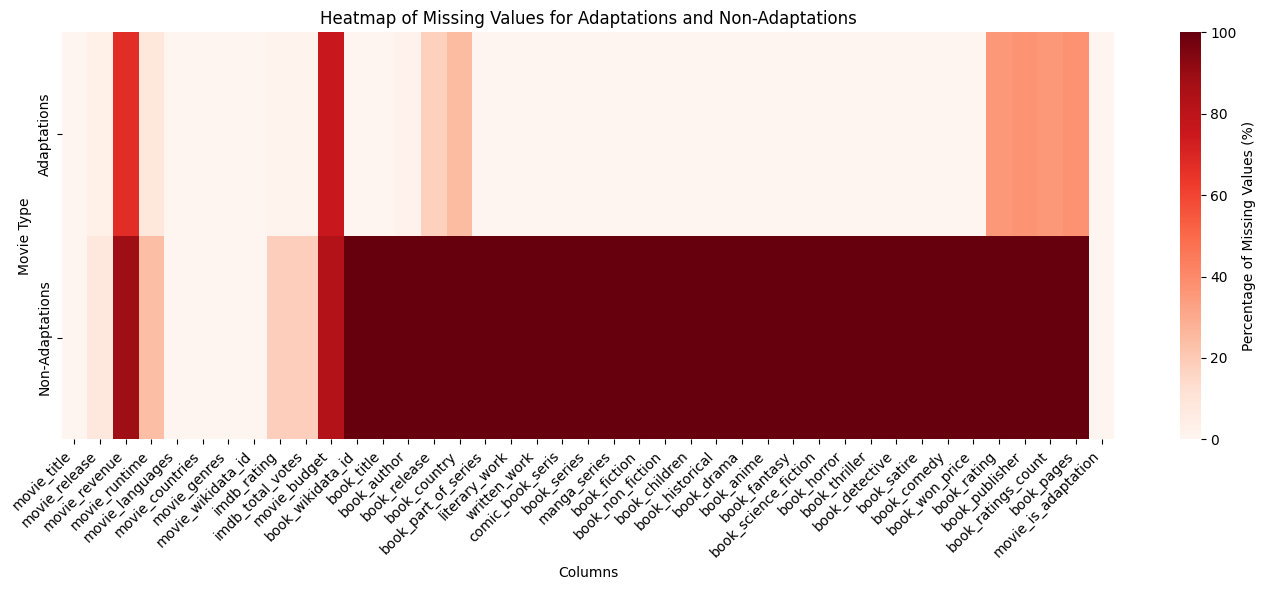

In [ ]:
heatmap_missing_values(dataset)

For the non adaptation movies, it is normal not to have informations related to books.

- movie_revenue: This feature has a significant proportion of missing data, especially for non-adaptations, which might impact our analysis on financial performance and budget-revenue comparisons.

- movie_budget: also shows a considerable percentage of missing values for non-adaptations. This could be important for analyzing budget trends and their correlation with box office performance.

- movie_runtime: The percentage of missing values for this feature is moderate, suggesting that while there is data available, some gaps remain. This feature is relevant for exploring how runtime correlates with success metrics.

- imdb_rating and imdb_total_votes: These features are relatively complete for both adaptations and non-adaptations, making them reliable for analyzing the critical and audience reception of movies.

- book_rating and book_ratings_count: The heatmap shows that while there is data available for adaptations, there are still some gaps.

- book_pages: This feature is relevant when assessing whether the length of a book impacts its adaptation's success. The heatmap indicates some missing values for adaptations, which could limit the analysis

### Plot proportion of missing data for movie_revenue and movie_budget over time

In [ ]:
# Calculate the percentage of missing revenue and budget data by year
missing_revenue_by_year_adapt = proportion_missing_values(dataset, 'movie_revenue', 'movie_release', True)
missing_revenue_by_year_non_adapt= proportion_missing_values(dataset, 'movie_revenue', 'movie_release', False)
missing_budget_by_year_adapt = proportion_missing_values(dataset, 'movie_budget', 'movie_release', True)
missing_budget_by_year_non_adapt = proportion_missing_values(dataset, 'movie_budget', 'movie_release', False)


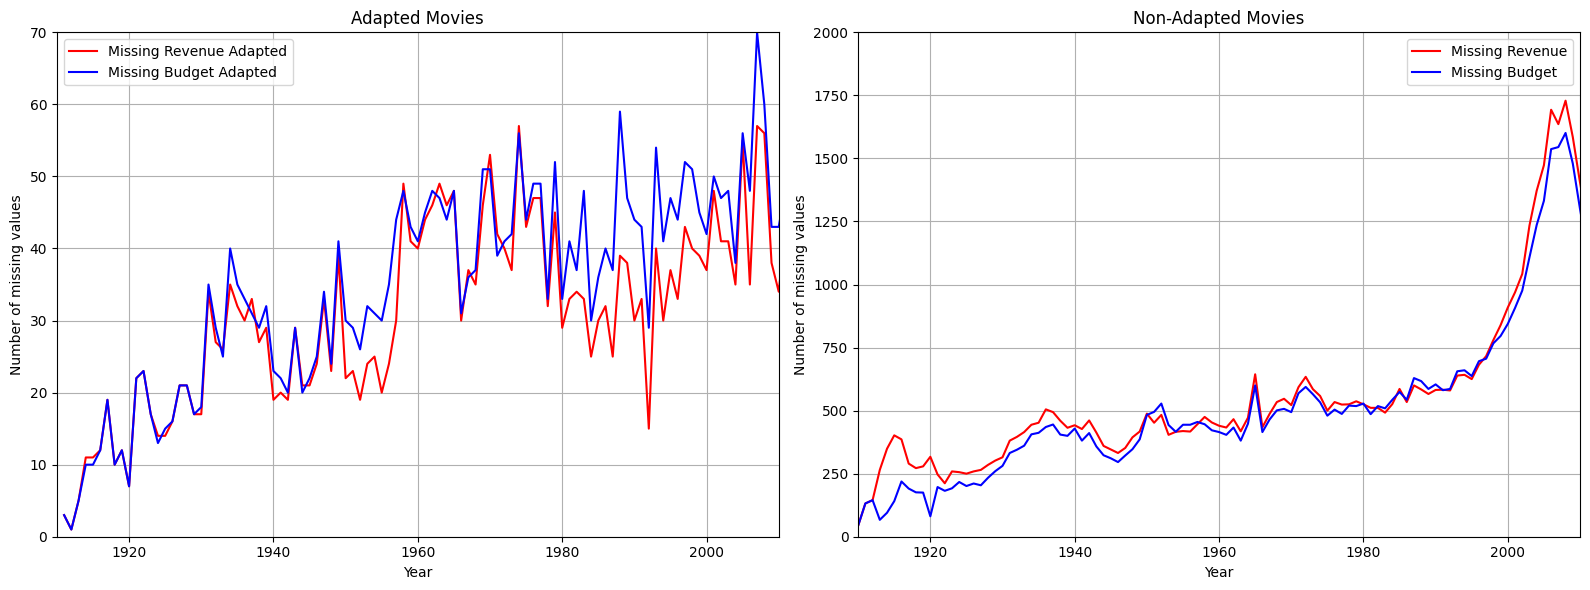

In [ ]:
plot_missing_revenues_budget(missing_revenue_by_year_adapt,missing_budget_by_year_adapt,missing_revenue_by_year_non_adapt,missing_budget_by_year_non_adapt)

- Adapted Movies:

    The number of missing values for both movie_revenue and movie_budget has fluctuated but generally increased over time.
    
    Post-1960s, there is a more noticeable increase, indicating more adaptations with incomplete data, possibly due to a rise in movie production.

- Non-Adapted Movies:

    A more consistent trend is observed, with missing values for both features gradually increasing over time, especially from the 1980s onward.

    The late 20th century and early 21st century show a sharp rise in missing data, which may reflect the growth in movie production but incomplete financial records.

For both groups we observe a higher number of missing values in more recent movies.

In [ ]:
missing_budget_count = dataset['movie_budget'].isna().sum()
print(f"Number of missing values in 'movie_budget': {missing_budget_count}")

missing_revenue_count = dataset['movie_revenue'].isna().sum()
print(f"Number of missing values in 'movie_revenue': {missing_revenue_count}")

Number of missing values in 'movie_budget': 62772
Number of missing values in 'movie_revenue': 66785


In order to tackle this high amount of missing values for movie_revenue and movie_budget. We decided to try and extract more values using a SPARQL query in the data_extraction.ipynb file. Let's see if it has improven our results:

In [ ]:
dataset_expanded=pd.read_csv('data/book_adaptation_expanded.csv')

In [ ]:
merged_df = dataset.merge(
    dataset_expanded,
    on='movie_wikidata_id',
    how='left'
)

In [ ]:
# Fill NaN values in the original budget and revenue columns using the fetched data
merged_df['movie_budget'] = merged_df['movie_budget'].fillna(merged_df['budget'])
merged_df['movie_revenue'] = merged_df['movie_revenue'].fillna(merged_df['revenue'])

# Drop auxiliary columns after merging
merged_df.drop(['budget', 'revenue'], axis=1, inplace=True)

# Final check to ensure row count consistency
print(f"Original DataFrame length: {len(dataset)}")
print(f"DataFrame length after merging: {len(merged_df)}")

# Save the updated DataFrame
merged_df.to_csv("updated_book_adaptation_df.csv", index=False)


Original DataFrame length: 76551
DataFrame length after merging: 76551


In [ ]:
#Checking for potential improvement 
missing_budget_count_new = merged_df['movie_budget'].isna().sum()
print(f"Number of missing values in 'movie_budget': {missing_budget_count_new}")

missing_revenue_count_new = merged_df['movie_revenue'].isna().sum()
print(f"Number of missing values in 'movie_revenue': {missing_revenue_count_new}")

Number of missing values in 'movie_budget': 61700
Number of missing values in 'movie_revenue': 65909


In [ ]:
# Calculate the reduction in missing values for movie_budget and movie_revenue
budget_improvement = missing_budget_count - missing_budget_count_new
revenue_improvement = missing_revenue_count - missing_revenue_count_new

# Print out the improvements
print(f"Reduction in missing values for 'movie_budget': {budget_improvement}")
print(f"Reduction in missing values for 'movie_revenue': {revenue_improvement}")


Reduction in missing values for 'movie_budget': 1072
Reduction in missing values for 'movie_revenue': 876


We see that we managed to obtain some more data. The amount of Nan values is still significant , however the improvment stays notable 

In [ ]:
#Setting the dataset as the merged dataset in which more values are present for movie_revenue and movie_budget
dataset=merged_df

So there are approximately 80% of NAs for revenue and budget. This very large number is inconvenient for our analysis since we want to explore how books traits could lead to successful adaptations. We decided to use an auxiliary dataset composed of 20-25% of our original dataset to get these informations. 

In [ ]:
#auxiliary dataset composed of rows with at least one of revenue or budget non missing
auxiliary_dataset_revenue_budget = dataset.dropna(subset=['movie_revenue', 'movie_budget'], how='all')

#Ensure we have 20-25% of the original dataset as expected
print(proportion_of_dataset(dataset, auxiliary_dataset_revenue_budget))


25.807631513631435


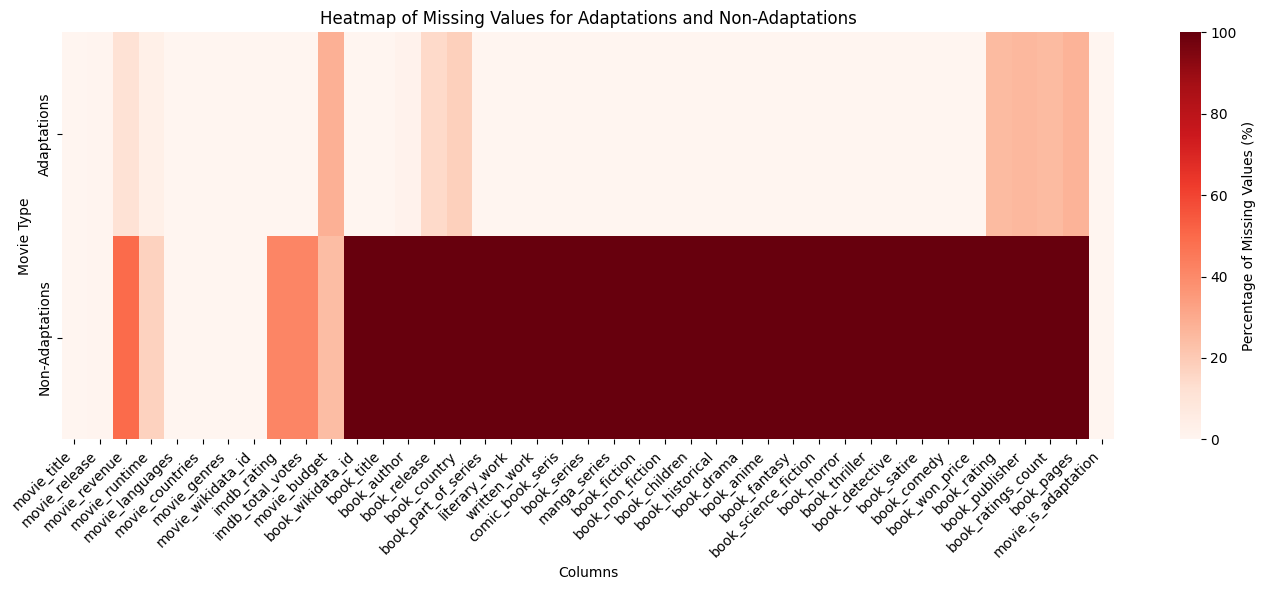

In [ ]:
#Visualize distribution of NAs in the auxiliary dataset
heatmap_missing_values(auxiliary_dataset_revenue_budget)

### Handle NAs for book_pages and movie_runtime

In [ ]:
#Keep count of NAs before imputation 

# Count the number of missing 'book_pages' only for adaptations
missing_book_pages_count = dataset[dataset['movie_is_adaptation'] == True]['book_pages'].isna().sum()

# Calculate the proportion of missing 'book_pages' for adaptations
total_adaptations = dataset[dataset['movie_is_adaptation'] == True].shape[0]
proportion_missing_book_pages = (missing_book_pages_count / total_adaptations) * 100

#Count the number of missing 'movie_runtime'
missing_runtime_count = dataset['movie_runtime'].isna().sum()


In [ ]:
# Fill NaNs in 'book_pages' and 'movie_runtime' with their respective medians
dataset['book_pages']= dataset['book_pages'].fillna(dataset['book_pages'].median())
dataset['movie_runtime'] = dataset['movie_runtime'].fillna(dataset['movie_runtime'].median())

In [ ]:
# Print the count of NaNs before filling
print("Before filling NaNs:")
print(f"Missing 'book_pages' count for adaptations: {missing_book_pages_count}")
print(f"Proportion of missing 'book_pages' for adaptations: {proportion_missing_book_pages:.2f}%")
print(f"Number of missing values in 'movie_runtime': {missing_runtime_count}")

# Print the count of NaNs after filling
print("\nAfter filling NaNs:")
print(f"Missing 'book_pages' count: {dataset['book_pages'].isna().sum()}")
print(f"Missing 'movie_runtime' count: {dataset['movie_runtime'].isna().sum()}")


Before filling NaNs:
Missing 'book_pages' count for adaptations: 1839
Proportion of missing 'book_pages' for adaptations: 37.52%
Number of missing values in 'movie_runtime': 17702

After filling NaNs:
Missing 'book_pages' count: 0
Missing 'movie_runtime' count: 0


#### Why do we think it is okay to use this method for imputation 
Filling NaNs for book_pages and movie_runtime with the median is appropriate because these features are continuous and have natural variability within a typical range. The median provides a central value that represents the majority of observations without being skewed by outliers. This ensures that the imputed values align with realistic counts for book pages and movie runtimes, maintaining the integrity of the data for further analysis.

### Assessing usability of book_ratings 

In [ ]:
print_missing_values_summary(dataset, ['book_rating'], adaptation=True)

Count of adapted movies: 4901

Missing Values Summary:
book_rating: 1764 missing values (35.99%)

Proportion of missing values for adaptations:
book_rating: 35.99%

Proportion of missing values for the entire dataset (including non-adaptations):
book_rating: 2.30%


With 35.99% of book_rating data missing for adaptations, there is still a majority (about 64%) of data available. So we have enough data to perform meaningful analyses, but any conclusions drawn may be influenced by the missing values.

# Handling outliers
Based on the statistical description of the dataset performed earlier, we can see that outliers values are present only for the runtime features.

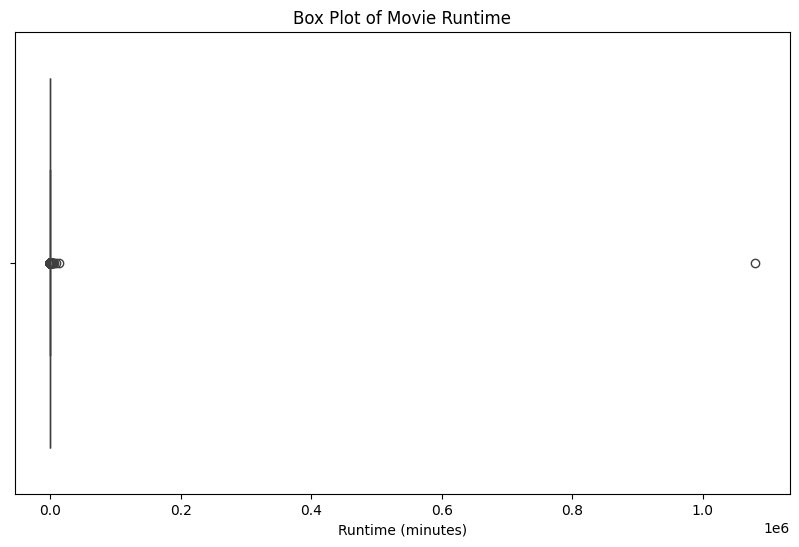

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=dataset['movie_runtime'])
plt.title('Box Plot of Movie Runtime')
plt.xlabel('Runtime (minutes)')
plt.show()

In [ ]:
# We searched for the longest movie existing and it appeared to be 240h long so 14400 min
threshold = 14400

# Identify high outliers
high_outliers = dataset[dataset['movie_runtime'] > threshold]
print("Number of high outliers using percentile:", high_outliers.shape[0])
print("High outliers:\n", high_outliers['movie_runtime'])

#Deletion of the outlier from the dataset
dataset=dataset.drop(high_outliers.index)

Number of high outliers using percentile: 0
High outliers:
 Series([], Name: movie_runtime, dtype: float64)


# Feature engineering 

We may consider creating some features that will later serve for our analysis

In [ ]:
#Dataset
# Time gap between movie release and book relase
dataset['time_gap'] = dataset['movie_release'] - dataset['book_release']

#measure profitability of a movie
dataset['revenue_budget_ratio'] = dataset['movie_revenue'] / dataset['movie_budget']

#Auxiliary Dataset
auxiliary_dataset_revenue_budget['time_gap'] = auxiliary_dataset_revenue_budget['movie_release'] - auxiliary_dataset_revenue_budget['book_release']
auxiliary_dataset_revenue_budget['revenue_budget_ratio'] =auxiliary_dataset_revenue_budget['movie_revenue'] / auxiliary_dataset_revenue_budget['movie_budget']

/var/folders/tf/wy7jpq61155d6ns51pvqlf240000gn/T/ipykernel_99132/1459068425.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  auxiliary_dataset_revenue_budget['time_gap'] = auxiliary_dataset_revenue_budget['movie_release'] - auxiliary_dataset_revenue_budget['book_release']
/var/folders/tf/wy7jpq61155d6ns51pvqlf240000gn/T/ipykernel_99132/1459068425.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  auxiliary_dataset_revenue_budget['revenue_budget_ratio'] =auxiliary_dataset_revenue_budget['movie_revenue']

# First Data Visualizations after pre-processing

In [ ]:
df_visualization=dataset.copy()

## Proportion of adapted books in the dataset

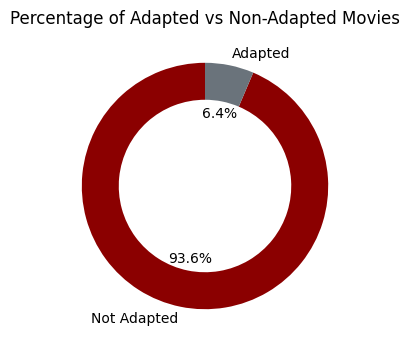

In [ ]:
# Calculate the counts of adapted vs non-adapted movies
adapted_counts = df_visualization['movie_is_adaptation'].value_counts()
labels = ['Not Adapted', 'Adapted']

# Plot the donut chart
plt.figure(figsize=(4, 4))
plt.pie(adapted_counts, labels=labels, autopct='%1.1f%%', colors=['#8B0000', '#6a737b'], startangle=90, wedgeprops=dict(width=0.3))
plt.title('Percentage of Adapted vs Non-Adapted Movies')
plt.show()

Adapted movies represent quite a small proportion of our dataset. This low value may limit the scope of certain conclusions or analyses. One way to handle that would be to balance the data. 

## Distribution of numerical features

For the numerical values, it is important to see how is the distribution and if it is needed to apply some kind of transformation. We're here considering : movie_revenue, movie_budget, imdb_rating, book_rating, book_pages

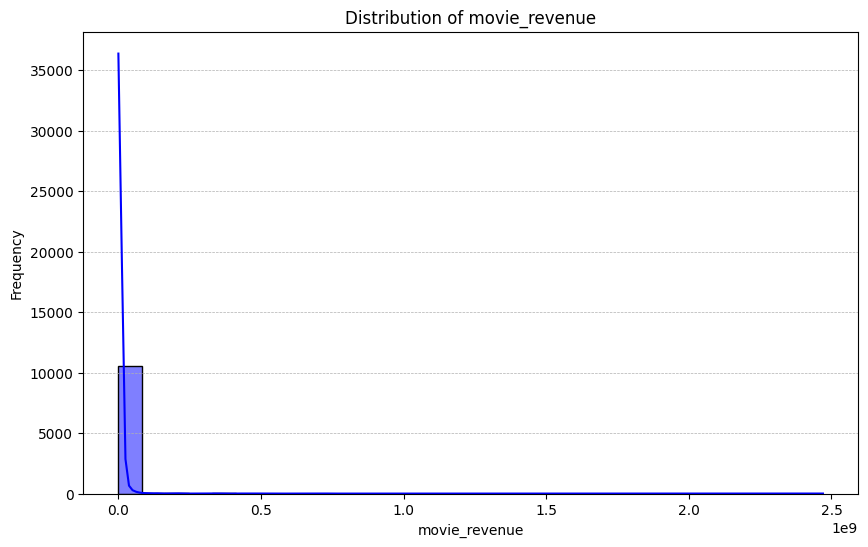

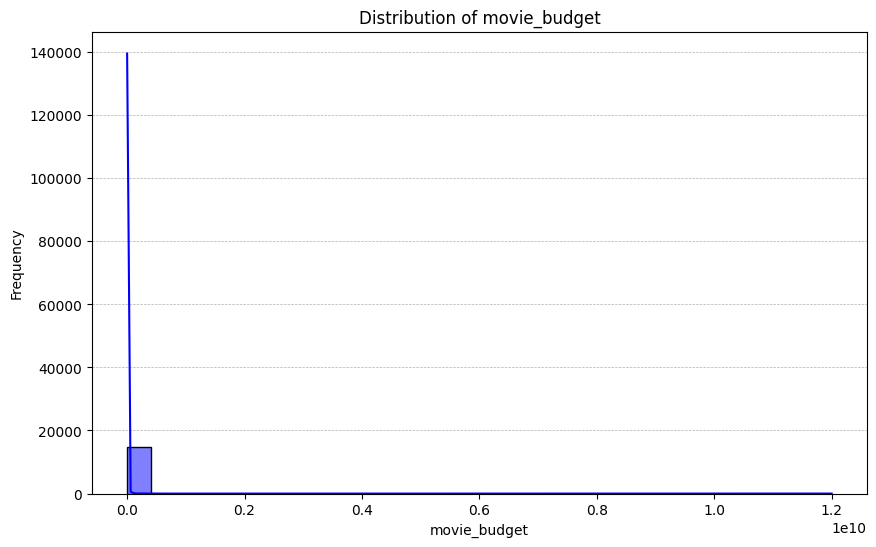

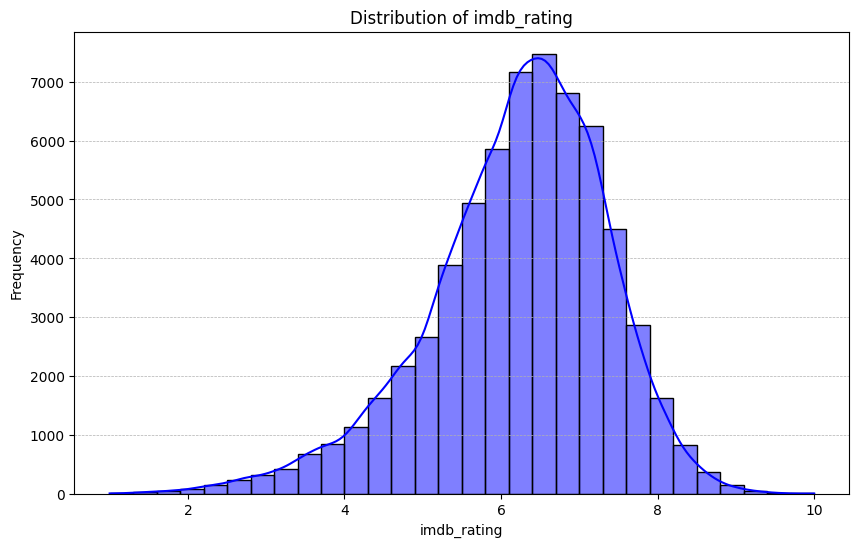

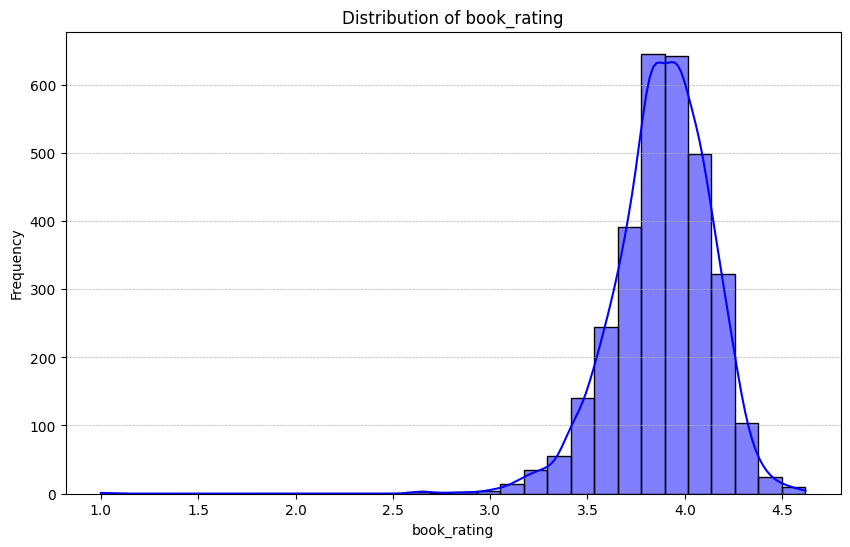

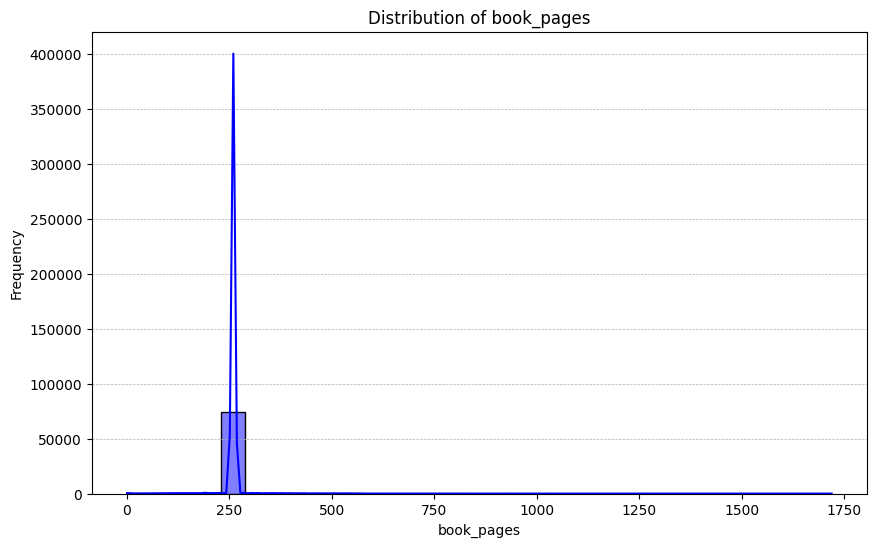

In [ ]:
# List of columns to plot
columns_to_plot = ['movie_revenue', 'movie_budget', 'imdb_rating', 'book_rating', 'book_pages']

# Call the function with your dataset and column list
plot_histograms(df_visualization, columns_to_plot)

The movie revenues and movie budget show 2 heavy tails distributions. A solution one could think of would be to use the log of the values.

In [ ]:
from scipy.stats import skew

skewness_revenue = dataset['movie_revenue'].skew()
skewness_budget=dataset['movie_budget'].skew()
print(f"Skewness of movie_revenue: {skewness_revenue}")
print(f"Skewness of movie_budget: {skewness_budget}")

## Books features

In [ ]:
df_visualization.columns

Index(['movie_title', 'movie_release', 'movie_revenue', 'movie_runtime',
       'movie_languages', 'movie_countries', 'movie_genres',
       'movie_wikidata_id', 'imdb_rating', 'imdb_total_votes', 'movie_budget',
       'book_wikidata_id', 'book_title', 'book_author', 'book_release',
       'book_country', 'book_part_of_series', 'literary_work', 'written_work',
       'comic_book_seris', 'book_series', 'manga_series', 'book_fiction',
       'book_non_fiction', 'book_children', 'book_historical', 'book_drama',
       'book_anime', 'book_fantasy', 'book_science_fiction', 'book_horror',
       'book_thriller', 'book_detective', 'book_satire', 'book_comedy',
       'book_won_price', 'book_rating', 'book_publisher', 'book_ratings_count',
       'book_pages', 'movie_is_adaptation', 'time_gap',
       'revenue_budget_ratio'],
      dtype='object')

### Top genres

On the one hand, we need to understand how are ditributed the different genres of books, which ones are preferred. and see how they may be distributed baswed on various criterias.
To begin with, we're going to analyze the top 10 genres distribution.

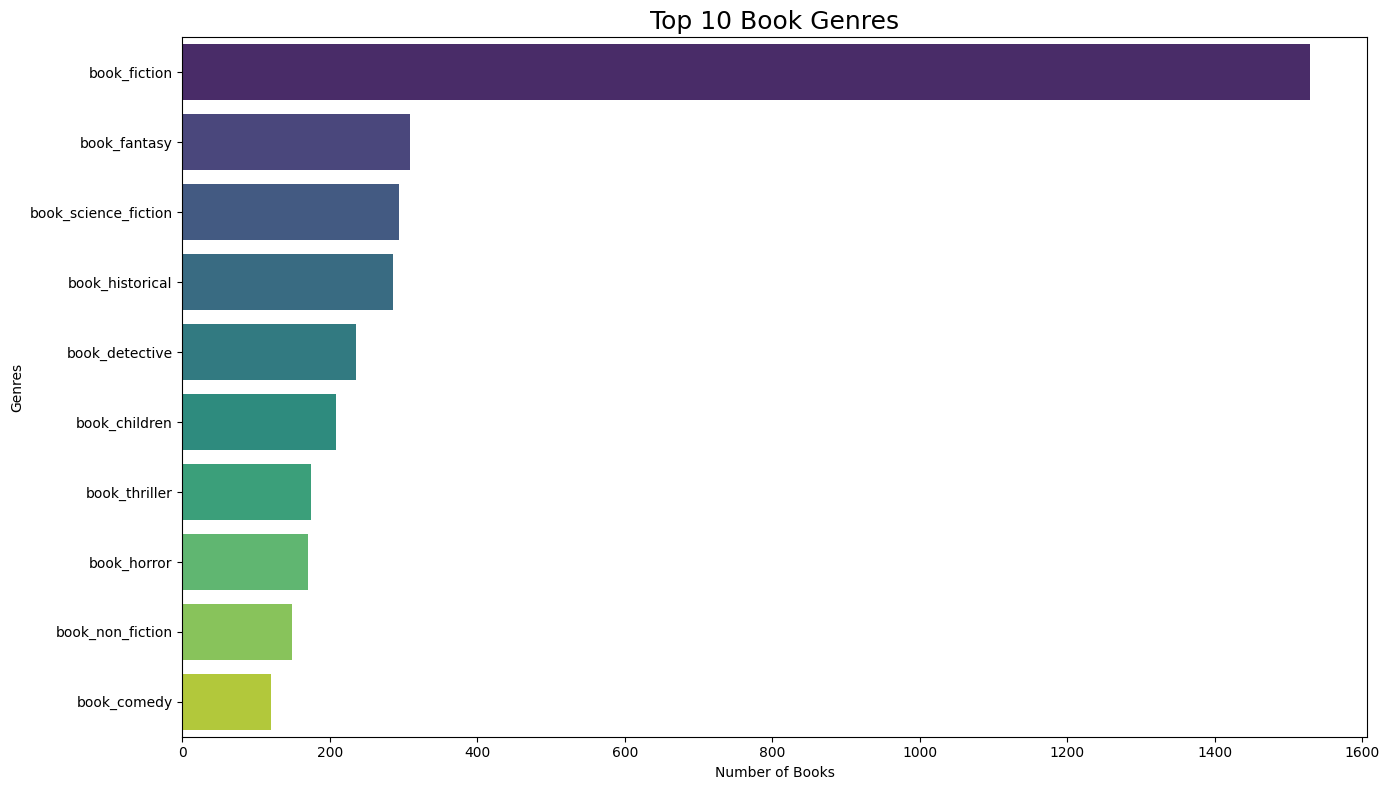

In [ ]:
# Get list of individual book genres
book_genre_columns = [
    'book_fiction', 'book_non_fiction', 'book_children', 'book_historical',
    'book_drama', 'book_anime', 'book_fantasy', 'book_science_fiction',
    'book_horror', 'book_thriller', 'book_detective', 'book_satire',
    'book_comedy'
]
# Count the number of books for each genre
genre_counts = df_visualization[book_genre_columns].sum().sort_values(ascending=False).head(10)
top_genres = genre_counts.index

# Plot the top 10 book genres
plt.figure(figsize=(14, 8))
sns.barplot(x=genre_counts.values, y=top_genres, palette='viridis', legend = False, hue= top_genres)
plt.title('Top 10 Book Genres', fontsize=18)
plt.xlabel('Number of Books')
plt.ylabel('Genres')
plt.tight_layout()
plt.show()


We see that fiction is the predominant genre, then fantasy, science fiction and historical have tighly close amount

### Evolution of genres popularity by decades

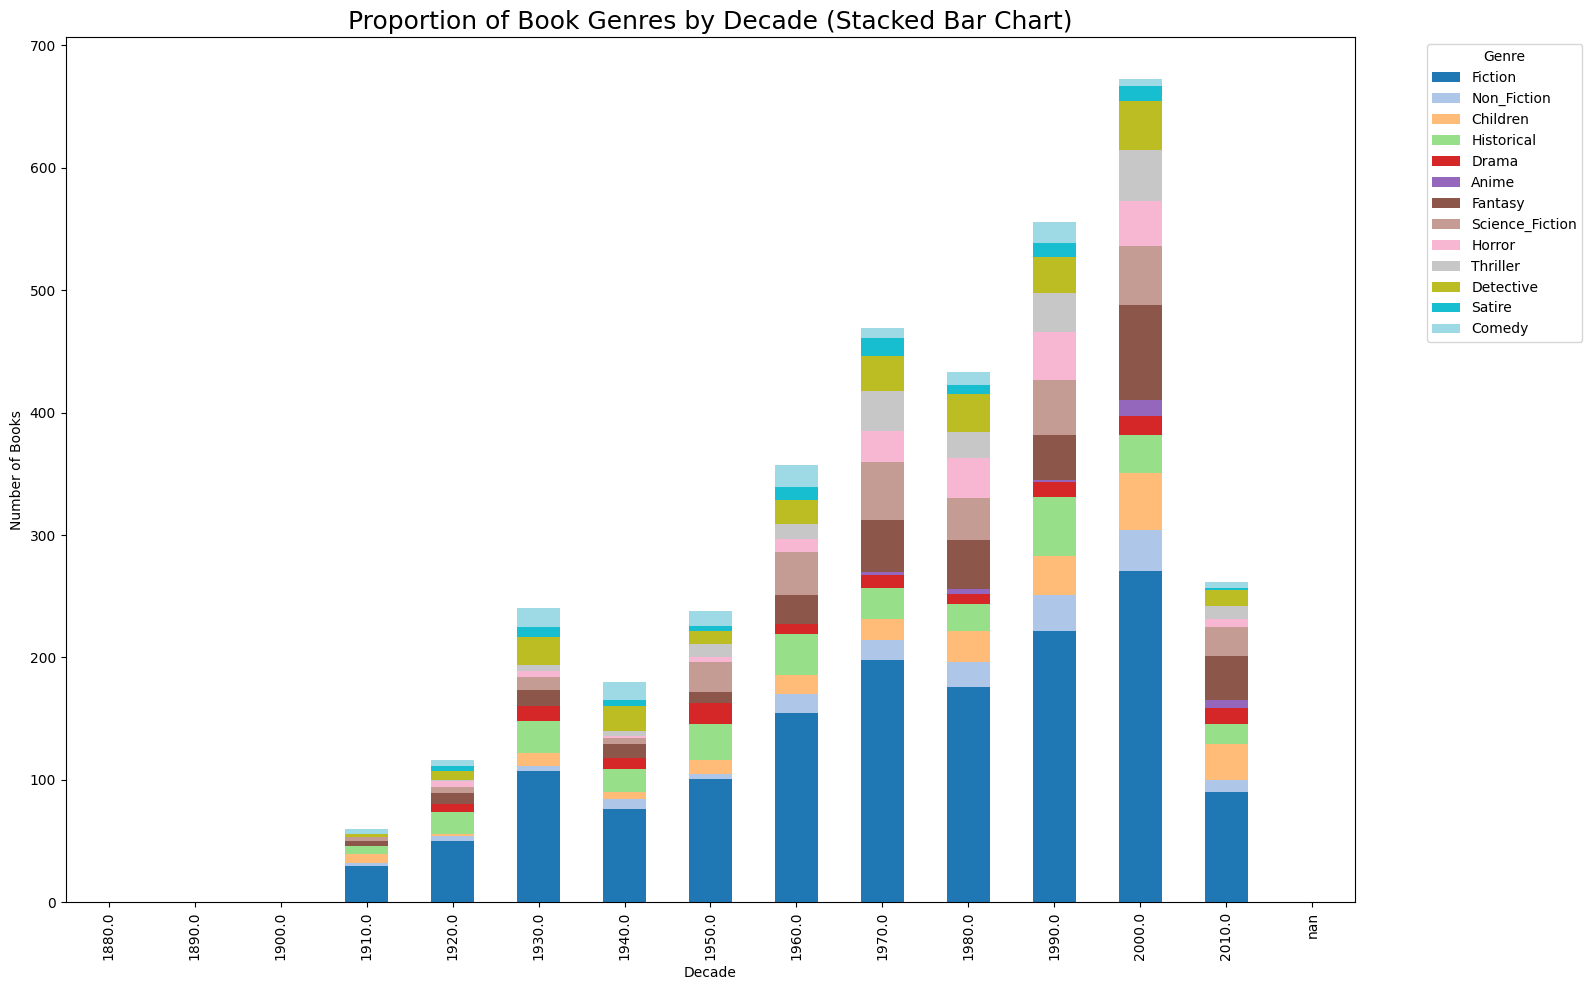

In [ ]:
# Group data by decade
df_visualization['decade'] = (df_visualization['movie_release'] // 10) * 10
decade_counts = pd.DataFrame(index=pd.Series(df_visualization['decade'].unique()).sort_values())

# Count the number of books for each genre by decade
for genre in book_genre_columns:
    genre_name = genre.replace('book_', '').title()
    decade_counts[genre_name] = df_visualization[df_visualization[genre] == True].groupby('decade').size()

# Fill NaNs with 0 and plot the stacked bar chart
decade_counts.fillna(0, inplace=True)
decade_counts.plot(kind='bar', stacked=True, figsize=(16, 10), colormap='tab20')
plt.title('Proportion of Book Genres by Decade (Stacked Bar Chart)', fontsize=18)
plt.xlabel('Decade')
plt.ylabel('Number of Books')
plt.legend(title='Genre', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

The chart illustrates the proportions of different genres among books that were deemed worthy of film adaptations over the years. 
Fiction consistently represents a significant portion of book adaptations across all decades. This suggests that stories within this broad category have been a reliable source for adaptations, likely due to their diverse storytelling potential that appeals to a wide range of audiences.

In more recent decades (e.g., 1980s onward), there is noticeable growth in the diversity of genres being adapted. Fantasy, Science Fiction, and Children's literature show an increase in their share, particularly in the 1990s and 2000s.The increase in Fantasy and Science Fiction adaptations might reflect the film industry's response to the growing audience interest in these genres, bolstered by major adaptations like The Lord of the Rings and Harry Potter series.

Genres like Historical, Drama, and Thriller maintain a steady but smaller share throughout the decades. This steady presence suggests that while they may not dominate the landscape, they are consistently chosen for adaptation due to their compelling narratives and the potential for critical acclaim.

The overall number of adaptations increases as time progresses, with a significant jump in the 1990s and 2000s. This increase could be due to a combination of factors, including the expansion of the global film industry, better adaptation techniques, and a growing appetite for diverse storytelling.

### Top Genres by countries

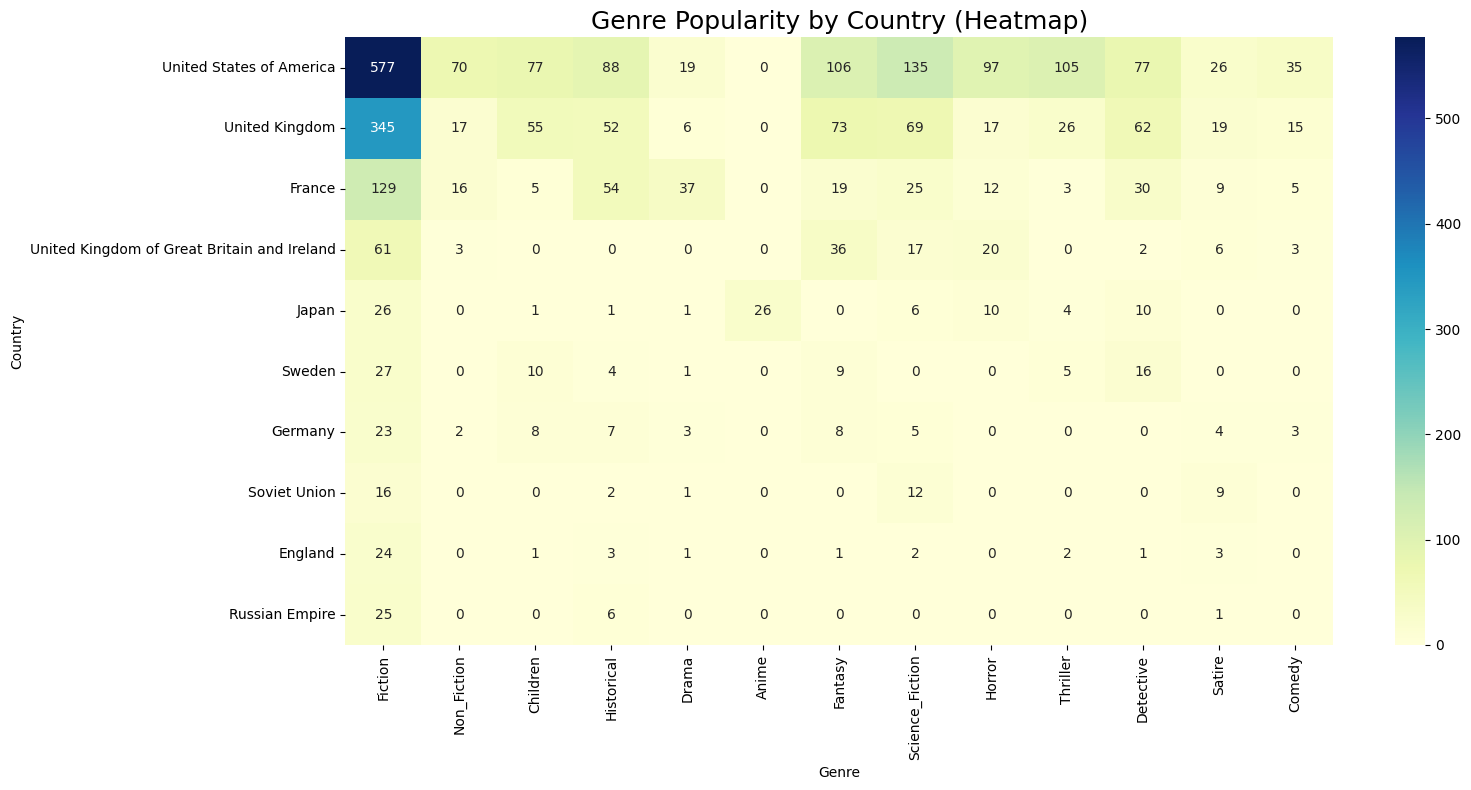

In [ ]:
# Genre counts by country
genre_counts_country = pd.DataFrame()

for genre in book_genre_columns:
    genre_name = genre.replace('book_', '').title()
    genre_counts_country[genre_name] = df_visualization[df_visualization[genre] == True].groupby('book_country').size()

# Filter top countries by total adaptations
genre_counts_country.fillna(0, inplace=True)
top_countries_heatmap = genre_counts_country.sum(axis=1).sort_values(ascending=False).head(10).index
genre_counts_country_filtered = genre_counts_country.loc[top_countries_heatmap]

# Plot heatmap
plt.figure(figsize=(16, 8))
sns.heatmap(genre_counts_country_filtered, cmap='YlGnBu', annot=True, fmt=".0f")
plt.title('Genre Popularity by Country (Heatmap)', fontsize=18)
plt.xlabel('Genre')
plt.ylabel('Country')
plt.tight_layout()
plt.show()


The heatmap illustrates clear differences in how various countries approach book-to-movie adaptations, with the United States leading in volume and diversity. The United Kingdom and France show strong preferences for Drama and Historical genres (putting aside the fictional books), reflecting their cultural and cinematic traditions. Countries like Japan stand out for unique contributions, such as Anime, while other nations show varied yet smaller-scale adaptation preferences.


### What genres are more often parts of series ? 

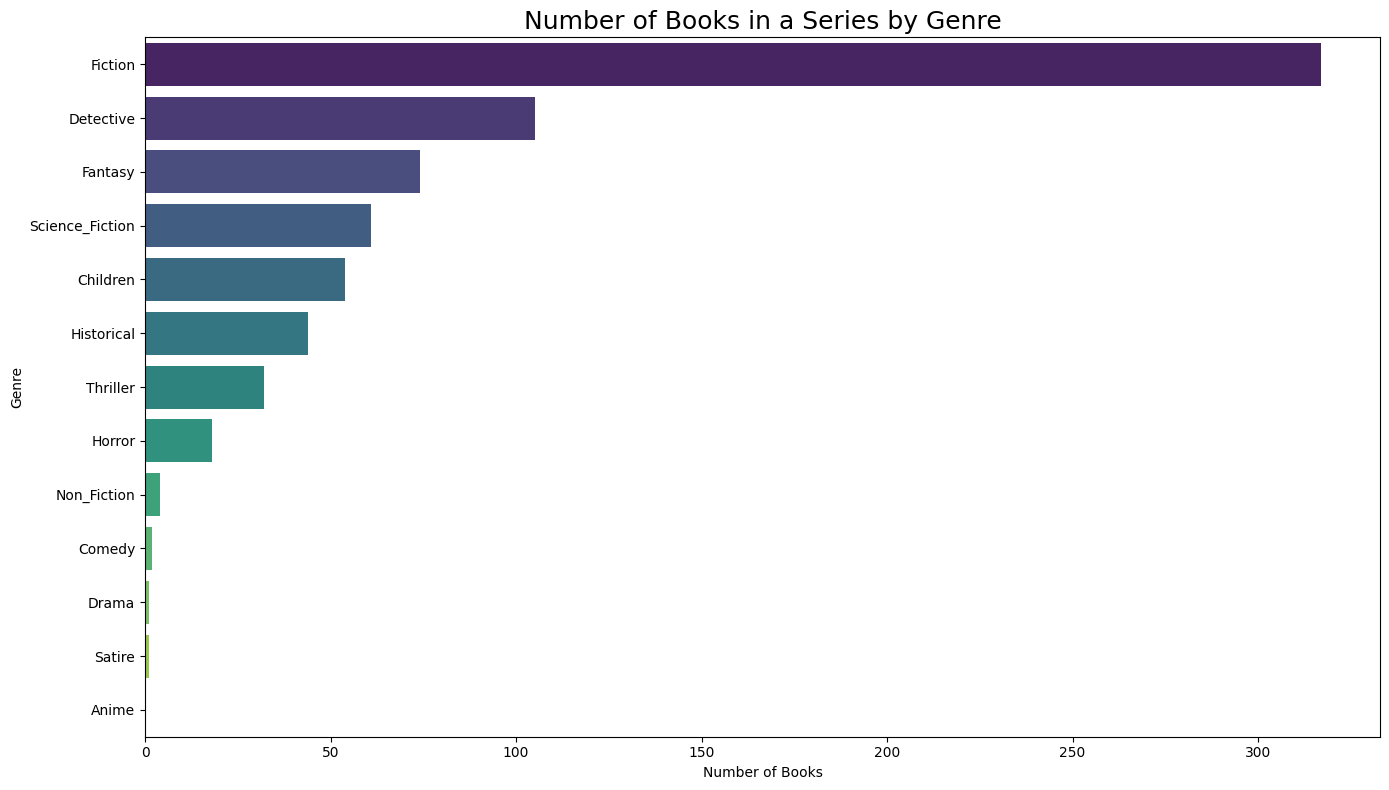

In [ ]:
# Filter data for books that are part of a series
series_data = df_visualization[df_visualization['book_part_of_series'] == True]

# Create a DataFrame to count the number of books in series for each genre
series_counts = {}
for genre in book_genre_columns:
    genre_name = genre.replace('book_', '').title()
    series_counts[genre_name] = series_data[series_data[genre] == True].shape[0]

# Convert to a Pandas Series for easy plotting
series_counts = pd.Series(series_counts).sort_values(ascending=False)

# Plot the bar chart
plt.figure(figsize=(14, 8))
sns.barplot(x=series_counts.values, y=series_counts.index, palette='viridis',legend=False,hue=series_counts.index)
plt.title('Number of Books in a Series by Genre', fontsize=18)
plt.xlabel('Number of Books')
plt.ylabel('Genre')
plt.tight_layout()
plt.show()

This bar chart highlights that Fiction dominates as the genre most commonly adapted from book series, pointing to its versatility and the audience's appetite for continuous storytelling. Detective and Fantasy genres also show strong representation in series, likely due to their potential for developing intricate plots and recurring characters that keep viewers engaged.The low numbers for Non-Fiction, Comedy, Drama, and Satire suggest that these genres often don't lend themselves to series-based storytelling, perhaps due to their focus on standalone narratives or themes that don't easily extend across multiple books.

### Number of people that rate books per country

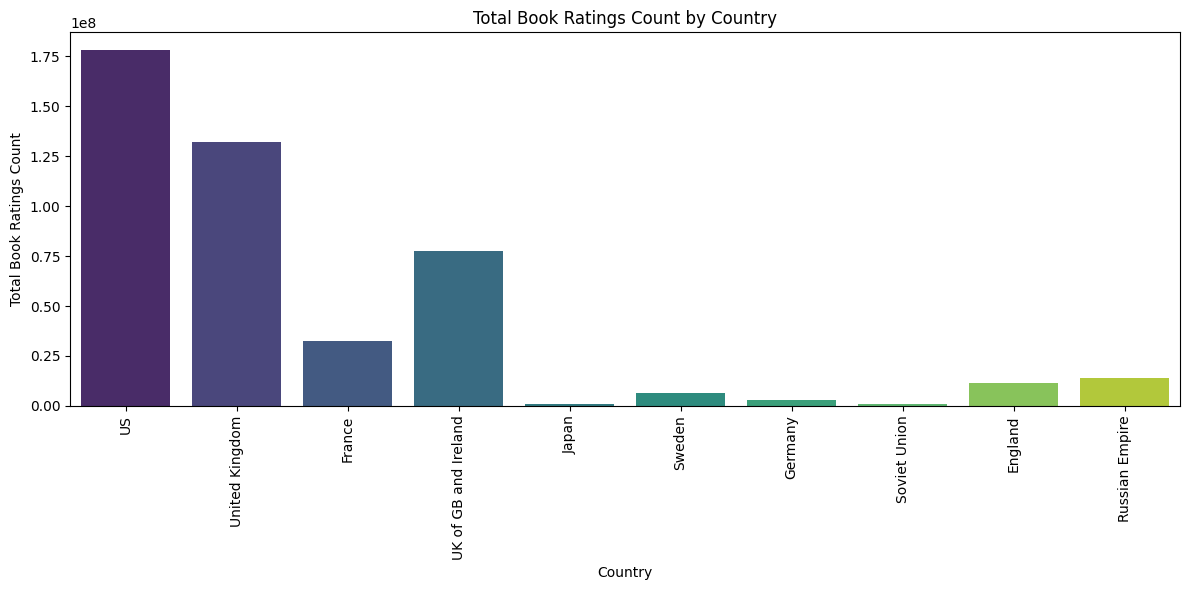

In [ ]:
# Create a DataFrame for total book ratings count by country
ratings_count_country = df_visualization.groupby('book_country')['book_ratings_count'].sum().sort_values(ascending=False)

# Filter the top countries by ratings count
top_countries_ratings = ratings_count_country.loc[top_countries_heatmap]  # Using previously defined `top_countries_heatmap`

# Create a dictionary to map long country names to shorter versions
country_name_map = {
    'United States of America': 'US',
    'United Kingdom of Great Britain and Ireland': 'UK of GB and Ireland',
}

# Replace country names in the dataframe
top_countries_ratings.index = top_countries_ratings.index.to_series().replace(country_name_map) 

# Plot the data
plt.figure(figsize=(12, 6))
sns.barplot(x=top_countries_ratings.index, y=top_countries_ratings.values, palette='viridis', legend=False, hue =top_countries_ratings.index )
plt.title('Total Book Ratings Count by Country')
plt.xlabel('Country')
plt.ylabel('Total Book Ratings Count')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

ATTENDRE MOVIES VISUALIZATION TO LINK WITH THESE RESULTS

- Dominance of the US and the UK:

The United States (US) and the United Kingdom (UK) have a significantly higher total number of book ratings compared to other countries. This is consistent with the larger number of adaptations originating from these regions in the dataset.

- Lower Counts for Other Countries:

Countries like France, Germany, and Japan have much lower total book ratings counts, which aligns with fewer adaptations and literary representation in the dataset.

### Relation between book_pages and genres

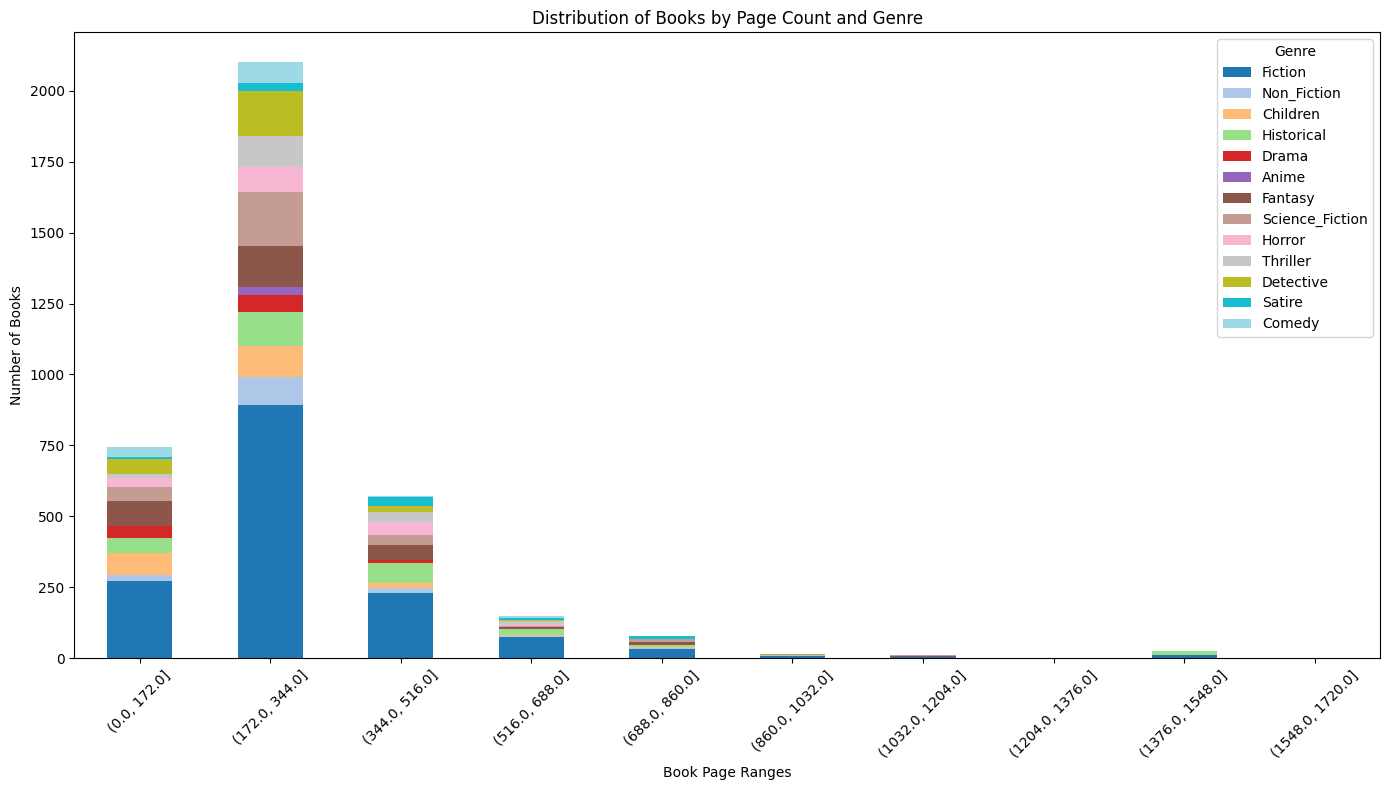

In [ ]:
# Define custom bins starting at 0 and ending at the maximum of 'book_pages' with 10 equal intervals
bin_edges = np.linspace(0, df_visualization['book_pages'].max(), 11)
bins = pd.cut(df_visualization['book_pages'], bins=bin_edges)

# Create a DataFrame to count the number of books in each genre for each bin
genre_counts_by_bins = pd.DataFrame()

for genre in book_genre_columns:
    genre_name = genre.replace('book_', '').title()
    # Count the number of books in each bin for the genre
    genre_counts_by_bins[genre_name] = df_visualization[df_visualization[genre] == True].groupby(bins, observed=False).size()

# Plotting the stacked bar chart
ax = genre_counts_by_bins.plot(kind='bar', stacked=True, figsize=(14, 8), colormap='tab20')
plt.title('Distribution of Books by Page Count and Genre')
plt.xlabel('Book Page Ranges')
plt.ylabel('Number of Books')
plt.xticks(rotation=45)
plt.legend(title='Genre')
plt.tight_layout()
plt.show()

The majority of books, regardless of genre, fall within the lower page count ranges (up to around 516 pages). Beyond this, the number of books in each genre decreases significantly. This trend implies that most books considered for adaptations or present in the dataset have relatively shorter lengths.

In the higher page count ranges (over 688 pages), there is a steep drop in the number of books, with very few genres appearing at these lengths. This could indicate that long books are less commonly adapted or are less prevalent in the dataset.

Since missing values for 'book_pages' were filled using the median, this could contribute to the concentration of books in certain page count ranges. The distribution might be slightly biased towards the median range, which could mask the true distribution of very short or very long books.